<a href="https://colab.research.google.com/github/andidprastyo/PCVK_Ganjil_2023/blob/main/week%20-%2003/tugas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

### Tugas 1 : Invert images

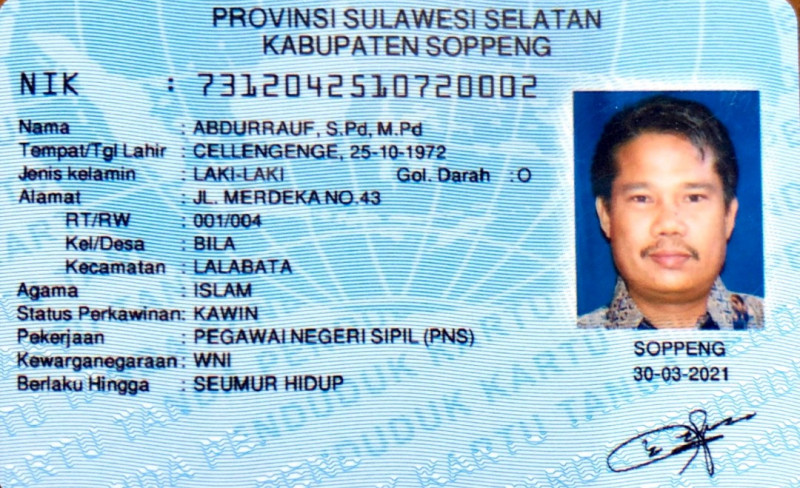

In [4]:
ktp = cv.imread('/content/drive/MyDrive/Images/Images/KTP.jpeg')
cv2_imshow(ktp)

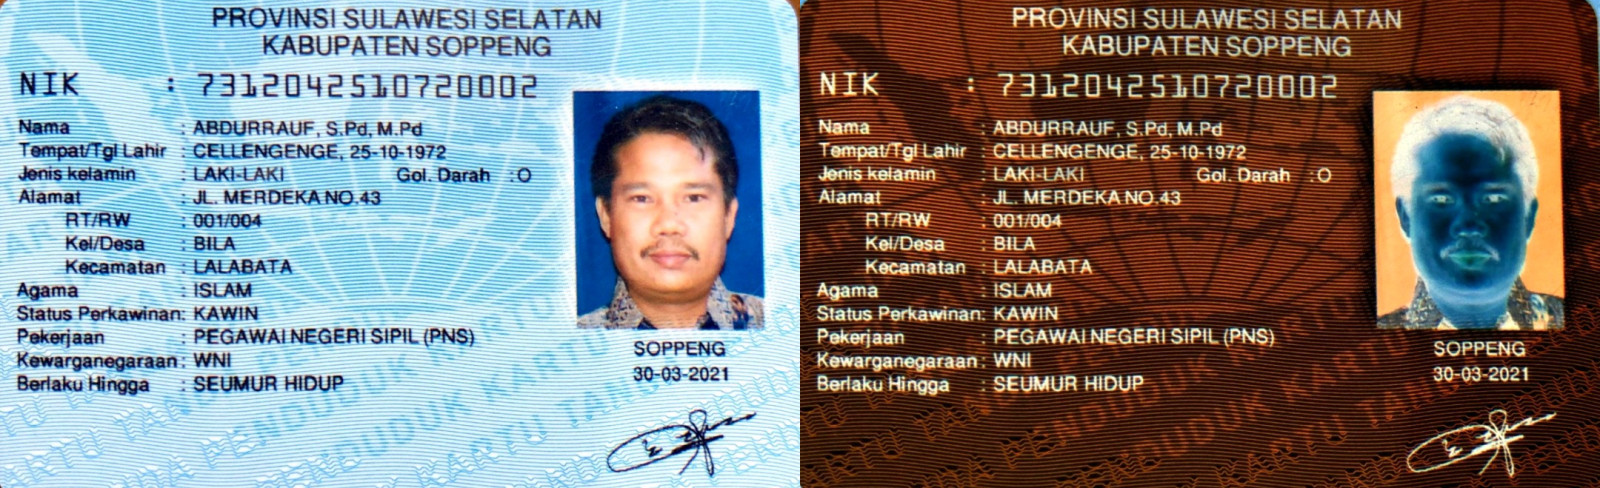

In [6]:
inverse_img = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverse_img[y,x,c] = np.abs(255 - ktp[y,x,c])

final_frame = cv.hconcat((ktp, inverse_img))
cv2_imshow(final_frame)

### Tugas 2 : Contrast

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


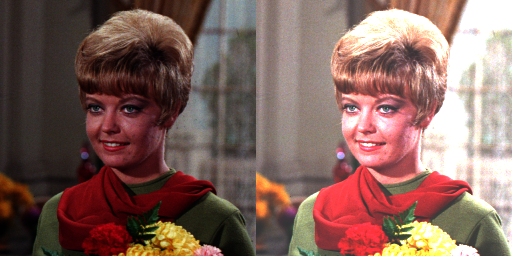

In [8]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number.')

original = cv.imread('/content/drive/MyDrive/Images/Images/female.tiff')
brightness_img = np.zeros(original.shape, original.dtype)
# Akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_img[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_img))
cv2_imshow(final_frame)

### Tugas 3 : Logarithmic Brightness

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


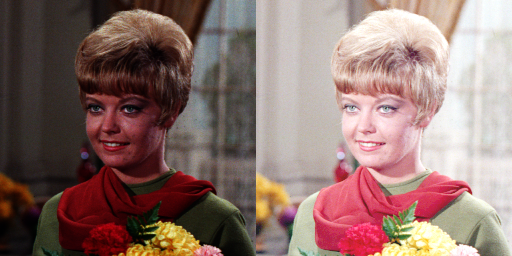

In [15]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number.')

original = cv.imread('/content/drive/MyDrive/Images/Images/female.tiff')
brightness_img = np.zeros(original.shape, original.dtype)

# Akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_img[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_img))
cv2_imshow(final_frame)

### Tugas 4 : Grayscale Transform

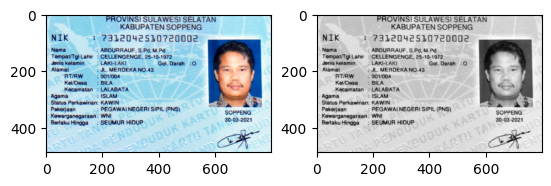

In [41]:
# Averaging

ktp = cv.imread('/content/drive/MyDrive/Images/Images/KTP.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
averaging = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    averaging[y,x] = np.mean(ktp[y,x])

fig, ax = plt.subplots(1, 2)
ax[0].imshow(ktp)
ax[1].imshow(averaging)



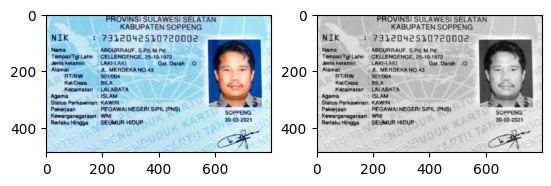

In [46]:
# Lightness

ktp = cv.imread('/content/drive/MyDrive/Images/Images/KTP.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
lightness = np.zeros(ktp.shape, ktp.dtype)

R = ktp[:, :, 0]
G = ktp[:, :, 1]
B = ktp[:, :, 2]

max_channel = np.maximum(np.maximum(R, G), B)
min_channel = np.minimum(np.minimum(R, G), B)

lightness_transform = max_channel/2 + min_channel/2

fig, ax = plt.subplots(1, 2)
ax[0].imshow(ktp)
ax[1].imshow(lightness_transform, cmap='gray')



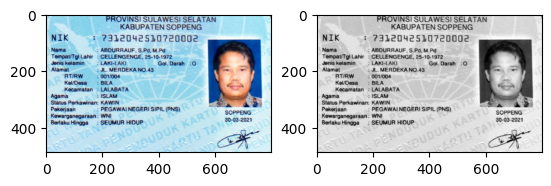

In [48]:
# Luminance

ktp = cv.imread('/content/drive/MyDrive/Images/Images/KTP.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
lightness = np.zeros(ktp.shape, ktp.dtype)

R = ktp[:, :, 0]
G = ktp[:, :, 1]
B = ktp[:, :, 2]

luminance_transform = (0.21 * R) + (0.72 * G) + (0.07 * B)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(ktp)
ax[1].imshow(luminance_transform, cmap='gray')


